In [1]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LinearRegression

geo = "GSE27486"

In [2]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Patnaik2012", silent=True)

In [3]:
data.metadata["platform_id"][0]

'GPL11432'

In [4]:
data.gpls[data.metadata["platform_id"][0]].table

,ID,name,accession,miRNA_LIST,SEQUENCE,database,SPOT_ID
0,10916,hsa-miR-1/mmu-miR-1,MIMAT0000416/MIMAT0000123,hsa-miR-1/mmu-miR-1,UGGAAUGUAAAGAAGUAUGUAU,miRBase 14.0,NaN
1,10998,hsa-miR-19b/mmu-miR-19b/rno-miR-19b,MIMAT0000074/MIMAT0000513/MIMAT0000788,hsa-miR-19b/mmu-miR-19b/rno-miR-19b,UGUGCAAAUCCAUGCAAAACUGA,miRBase 14.0,NaN
2,42918,hsa-miR-19b-2*,MIMAT0004492,hsa-miR-19b-2*,AGUUUUGCAGGUUUGCAUUUCA,miRBase 14.0,NaN
3,17883,hsa-miR-19b-1*,MIMAT0004491,hsa-miR-19b-1*,AGUUUUGCAGGUUUGCAUCCAGC,miRBase 14.0,NaN
4,10997,hsa-miR-19a/mmu-miR-19a/rno-miR-19a,MIMAT0000073/MIMAT0000651/MIMAT0000789,hsa-miR-19a/mmu-miR-19a/rno-miR-19a,UGUGCAAAUCUAUGCAAAACUGA,miRBase 14.0,NaN
...,...,...,...,...,...,...,...
2024,146204,-,NaN,NaN,NaN,NaN,146204
2025,42860,-,NaN,NaN,NaN,NaN,42860
2026,4040,-,NaN,NaN,NaN,NaN,4040
2027,146210,-,NaN,NaN,NaN,NaN,146210


In [5]:
list(data.gsms.values())[0].metadata

{'title': ['lung_adenocarcinoma_1'],
 'geo_accession': ['GSM679368'],
 'status': ['Public on May 20 2011'],
 'submission_date': ['Feb 24 2011'],
 'last_update_date': ['May 20 2011'],
 'type': ['RNA'],
 'channel_count': ['2'],
 'source_name_ch1': ['Lung adenocarcinoma case ID 1'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['gender: Female',
  'age: 76 y',
  'tissue: Lung adenocarcinoma',
  'disease: Lung adenocarcinoma'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was isolated from blood collected and stored in PAXgene Blood RNA tubes using a PAXgene Blood RNA isolation kit at the University of Pennsylvania as per the protocol suggested by the manufacturer (QiagenÂ®, Valencia, CA, USA). The human universal reference RNA was made by pooling contents of FirstChoice total RNA panel that is made of RNA from different tissues of multiple individuals (AmbionÂ®, Austin, TX, USA; catalog no. AM6000.'],
 'label_ch1': ['Hy3'],
 'l

In [6]:
table = pd.concat((val.table.iloc[:,1:2] for val in data.gsms.values()), axis=1).transpose()

In [7]:
#table = table.loc[:, (table > 0).all(0)]
table = table.dropna(1)

C:\Users\olefr\AppData\Local\Temp/ipykernel_33028/3290136690.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  table = table.dropna(1)


In [8]:
table.head()

,0,1,2,3,4,5,6,7,8,9,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
VALUE,-0.121811,0.681523,-0.278424,1.022933,-1.339246,-1.707187,0.224305,-1.029435,-1.895646,0.036548,...,2.580954,-0.657848,-0.020885,-0.329779,-2.630664,2.295395,-0.308364,0.206460,1.869079,0.182939
VALUE,-0.618272,0.968333,-0.047769,0.992508,-0.885852,-1.833941,0.099629,-0.952269,-1.355567,0.080132,...,3.030934,-0.824794,0.028160,-0.298583,-2.428550,2.702078,-0.267518,0.367792,1.185955,0.063379
VALUE,-0.371160,0.539894,-0.263893,0.968399,-0.109677,-1.938270,0.383531,-0.860962,-1.614382,0.099028,...,3.041195,-0.738480,-0.069795,-0.322930,-2.660806,2.856584,-0.154032,0.382982,0.911585,0.107294
VALUE,-0.545492,0.088346,-0.412304,0.784207,0.791398,-1.041545,0.626381,-0.957148,-0.406542,0.147417,...,4.764078,-0.676830,0.717817,-0.021230,-2.549759,4.531142,0.165427,0.828675,1.674162,-0.008375
VALUE,-0.669354,1.035114,-0.095419,0.948915,-1.700610,-1.163883,0.280384,-1.094740,-1.028080,0.022821,...,2.702192,-0.951415,0.095480,-0.398614,-2.167204,2.303261,-0.473805,0.107087,1.476674,0.382402


In [9]:
np.mean(table)

0      -0.470605
1       0.455437
2      -0.251423
3       0.995960
4      -0.622546
          ...   
2021    3.197722
2022   -0.466500
2023    0.306423
2024    1.476855
2025    0.045873
Length: 2026, dtype: float64

In [10]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [11]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

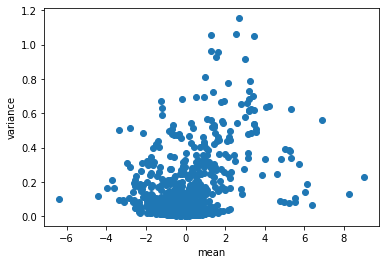

In [12]:
mean_variance_plot(table)

### Trying log-transformation

In [13]:
log_table = table#np.log2(table)

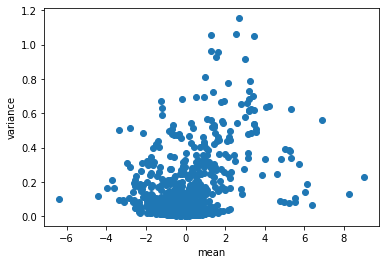

In [14]:
mean_variance_plot(log_table)

In [15]:
norm_log_table = log_table #- np.mean(log_table)
#norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

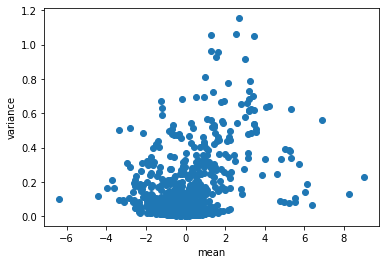

In [16]:
mean_variance_plot(norm_log_table)

In [17]:
pca = decomposition.PCA(n_components=2)

In [18]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [19]:
components = pca.transform(norm_log_table)

In [20]:
components

array([[ 3.23183587e+00, -5.10430066e+00],
       [ 2.17149930e+00,  2.26483161e+00],
       [ 7.61220942e-01,  3.40859948e+00],
       [-1.06644551e+01,  6.93911202e+00],
       [ 5.65431666e+00,  3.53906078e+00],
       [ 5.18504425e+00,  1.19354834e+00],
       [ 7.38395810e+00,  3.29728734e+00],
       [-3.39438811e+00,  6.23636588e+00],
       [ 1.15548496e+01, -3.89209893e+00],
       [ 1.48961819e+01,  1.16574204e-02],
       [ 3.77412767e+00, -2.88975131e+00],
       [ 8.81426667e+00, -3.28616486e+00],
       [-5.67445645e+00, -2.12912434e+00],
       [ 5.59993332e-01, -8.00983433e+00],
       [ 1.03244219e+01, -5.10873627e+00],
       [ 2.44593744e+00,  2.33206633e+00],
       [-5.47192215e+00,  1.58513848e+00],
       [-3.39148220e+00, -2.97503691e+00],
       [-2.52187570e+00, -8.85529730e+00],
       [ 7.10417977e+00, -8.11753372e-01],
       [-2.86047675e+00, -3.50393118e+00],
       [ 1.27832256e+01,  2.19868574e+00],
       [ 1.32464158e+01,  1.03874148e+01],
       [ 3.

In [21]:
list(data.gsms.values())[-1].metadata

{'title': ['no_cancer_49'],
 'geo_accession': ['GSM679412'],
 'status': ['Public on May 20 2011'],
 'submission_date': ['Feb 24 2011'],
 'last_update_date': ['May 20 2011'],
 'type': ['RNA'],
 'channel_count': ['2'],
 'source_name_ch1': ['No cancer control ID 49'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['gender: Male',
  'age: 53 y',
  'tissue: Normal lung',
  'disease: No cancer'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was isolated from blood collected and stored in PAXgene Blood RNA tubes using a PAXgene Blood RNA isolation kit at the University of Pennsylvania as per the protocol suggested by the manufacturer (QiagenÂ®, Valencia, CA, USA). The human universal reference RNA was made by pooling contents of FirstChoice total RNA panel that is made of RNA from different tissues of multiple individuals (AmbionÂ®, Austin, TX, USA; catalog no. AM6000.'],
 'label_ch1': ['Hy3'],
 'label_protocol_ch1': ['RNA was label

In [22]:
controls = np.array(["no_cancer" in k.metadata["title"][0] for k in list(data.gsms.values())])

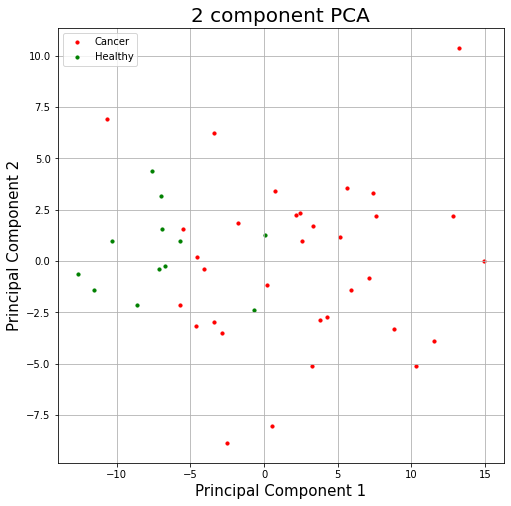

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

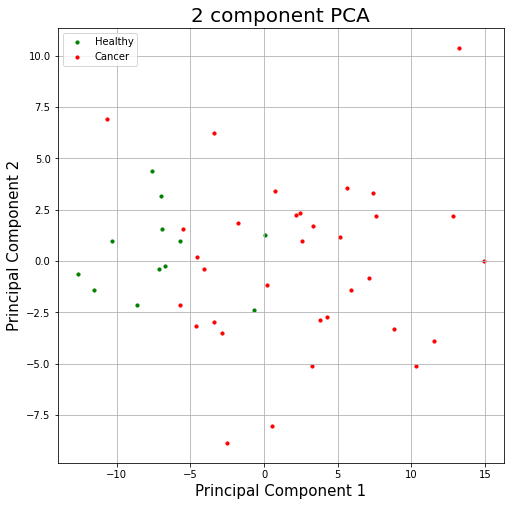

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy'][::-1]
colors = ['r', 'g']
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [25]:
sex = np.array(["Female" in k.metadata["characteristics_ch1"][0] for k in list(data.gsms.values()) if "post" not in k.metadata["characteristics_ch1"][0]])
age = np.array([float(k.metadata["characteristics_ch1"][1].split(" ")[1].replace("NA", "NaN")) for k in list(data.gsms.values()) if "post" not in k.metadata["characteristics_ch1"][0]])

In [26]:
covars = pd.DataFrame(np.array([sex, age]).transpose(), columns=["sex", "age"])

In [27]:
covars = covars.fillna(covars.mean())

In [28]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [29]:
adj_norm_log_table = norm_log_table #- linreg.predict(covars)

# PCA

In [30]:
pca = decomposition.PCA(n_components=2)

In [31]:
pca.fit(adj_norm_log_table)

PCA(n_components=2)

In [32]:
components = pca.transform(adj_norm_log_table)

In [33]:
components

array([[ 3.23183587e+00, -5.10430070e+00],
       [ 2.17149930e+00,  2.26483151e+00],
       [ 7.61220942e-01,  3.40859914e+00],
       [-1.06644551e+01,  6.93911210e+00],
       [ 5.65431666e+00,  3.53906067e+00],
       [ 5.18504425e+00,  1.19354835e+00],
       [ 7.38395810e+00,  3.29728741e+00],
       [-3.39438811e+00,  6.23636588e+00],
       [ 1.15548496e+01, -3.89209890e+00],
       [ 1.48961819e+01,  1.16574437e-02],
       [ 3.77412767e+00, -2.88975142e+00],
       [ 8.81426667e+00, -3.28616475e+00],
       [-5.67445645e+00, -2.12912451e+00],
       [ 5.59993332e-01, -8.00983438e+00],
       [ 1.03244219e+01, -5.10873640e+00],
       [ 2.44593744e+00,  2.33206621e+00],
       [-5.47192215e+00,  1.58513850e+00],
       [-3.39148220e+00, -2.97503709e+00],
       [-2.52187570e+00, -8.85529719e+00],
       [ 7.10417977e+00, -8.11753407e-01],
       [-2.86047675e+00, -3.50393116e+00],
       [ 1.27832256e+01,  2.19868574e+00],
       [ 1.32464158e+01,  1.03874149e+01],
       [ 3.

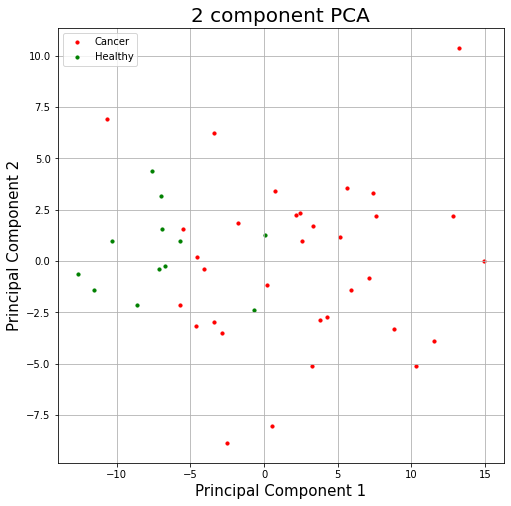

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Export data

In [35]:
lookup_table = data.gpls[data.metadata["platform_id"][0]].table

In [36]:
lookup_table = lookup_table.set_index("ID")

In [37]:
lookup_table.head()

,name,accession,miRNA_LIST,SEQUENCE,database,SPOT_ID
ID,,,,,,
10916,hsa-miR-1/mmu-miR-1,MIMAT0000416/MIMAT0000123,hsa-miR-1/mmu-miR-1,UGGAAUGUAAAGAAGUAUGUAU,miRBase 14.0,NaN
10998,hsa-miR-19b/mmu-miR-19b/rno-miR-19b,MIMAT0000074/MIMAT0000513/MIMAT0000788,hsa-miR-19b/mmu-miR-19b/rno-miR-19b,UGUGCAAAUCCAUGCAAAACUGA,miRBase 14.0,NaN
42918,hsa-miR-19b-2*,MIMAT0004492,hsa-miR-19b-2*,AGUUUUGCAGGUUUGCAUUUCA,miRBase 14.0,NaN
17883,hsa-miR-19b-1*,MIMAT0004491,hsa-miR-19b-1*,AGUUUUGCAGGUUUGCAUCCAGC,miRBase 14.0,NaN
10997,hsa-miR-19a/mmu-miR-19a/rno-miR-19a,MIMAT0000073/MIMAT0000651/MIMAT0000789,hsa-miR-19a/mmu-miR-19a/rno-miR-19a,UGUGCAAAUCUAUGCAAAACUGA,miRBase 14.0,NaN


In [38]:
mirnas = list(data.gsms.values())[0].table.iloc[:, 0]

In [39]:
sequences = lookup_table.loc[mirnas]["SEQUENCE"]

In [40]:
mask = np.array([set(str(s)).issubset(set("ACGU")) for s in sequences])
sequences = sequences[mask]
adj_norm_log_table = adj_norm_log_table.loc[:, mask]

In [41]:
adj_norm_log_table.columns = sequences
adj_norm_log_table["cancer"] = 1-controls
adj_norm_log_table.head()

C:\Users\olefr\AppData\Local\Temp/ipykernel_33028/2625337447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_norm_log_table["cancer"] = 1-controls


SEQUENCE,UGGAAGACUUGUGAUUUUGUUGU,UCGUACCGUGAGUAAUAAUGCG,CAGUGGUUUUACCCUAUGGUAG,UCAAAUGCUCAGACUCCUGUGGU,AUAAGACGAGCAAAAAGCUUGU,UAGCUUAUCAGACUGAUGUUGA,UGAGGUAGUAGUUUGUGCUGUU,CAGUGCAAUGUUAAAAGGGCAU,UGGAAUGUAAAGAAGUAUGUAU,AGCAGCAUUGUACAGGGCUAUGA,...,AAGGGAACGGGCUUGGCGGAAU,AGAGGUCUUGGGGCCGAAAC,UGAGGUAGUAGUUAGAA,UGGUUGUAGUCCGUGCGAGAAUA,AGACCUACUUAUCUACCAACAGC,AAAGGGGUCUGCAACCAAAGG,AUAGUUGUGUGUGGAUGUGUGU,CUUCCGCCCGGCCGGGUGUCG,AGCUUCUUUACAGUGCUGCCUUG,cancer
VALUE,1.022933,-1.339246,-1.707187,0.224305,-1.029435,-1.895646,-0.038300,1.027236,-3.185660,2.524909,...,-0.917919,-2.560878,0.130290,-1.359550,0.793162,-0.003517,-0.308364,0.206460,1.869079,1
VALUE,0.992508,-0.885852,-1.833941,0.099629,-0.952269,-1.355567,0.630305,0.998335,-2.936305,2.858892,...,-0.827355,-2.202802,0.409710,-2.405613,0.573656,0.168894,-0.267518,0.367792,1.185955,1
VALUE,0.968399,-0.109677,-1.938270,0.383531,-0.860962,-1.614382,1.842941,0.529960,-3.157844,2.958351,...,-0.994061,-2.511913,1.513879,-0.787819,0.124043,-0.179124,-0.154032,0.382982,0.911585,1
VALUE,0.784207,0.791398,-1.041545,0.626381,-0.957148,-0.406542,2.621279,1.587880,-3.052416,3.898693,...,-0.751215,-1.945900,1.914357,-2.682605,1.030038,-0.393014,0.165427,0.828675,1.674162,1
VALUE,0.948915,-1.700610,-1.163883,0.280384,-1.094740,-1.028080,0.040947,0.447970,-1.598852,3.073759,...,-0.919156,-2.506413,-0.740511,-3.008038,0.206258,-0.113756,-0.473805,0.107087,1.476674,1


In [42]:
adj_norm_log_table.to_csv("../TransformedData/Patnaik2012_raw.csv", index=False)